Вариант 7

5.1.7, 5.3.4, 5.5.4, 5.9.4 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import qr
import math
%matplotlib inline

#### 5.1.7

#### 1

In [2]:
x = np.array([-0.7, -0.41, -0.12, 0.17, 0.46, 0.75, 1.04,\
              1.33, 1.62, 1.91, 2.20], dtype=float)

y = np.array([-4.152, 1.244, 3.182, 2.689, 0.95, -2.743, -5.839,\
              -7.253, -6.1, -2.144, 6.103], dtype=float)

#### 2

In [3]:
def poly(a, x):
    m_1 = len(a)
    return sum([a[i]*x**i for i in range(m_1)])

def mnk(x, y, m=1):
    n = len(x)
    A = np.zeros(shape=(n, m+1))
    
    for i in range(n):
        for j in range(m+1):
            A[i, j] = x[i]**j
            
    return np.linalg.solve(np.dot(A.T, A), np.dot(A.T, y))

def err_func(x, y, a):
    n = len(x)
    m_1 = len(a)
    return np.sqrt(sum([(sum([a[i]*x[j]**i for i in range(m_1)]) - y[j])**2 for j in range(n)])/(n-m_1))

pl = 10
err_bar = [err_func(x, y, mnk(x, y, m)) for m in range(pl)]

#### 3

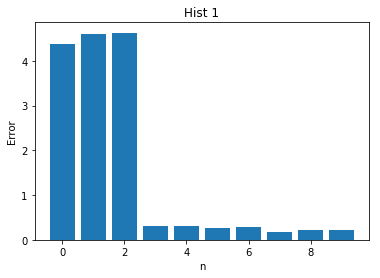

In [4]:
plt.bar(np.linspace(0, pl-1, pl), err_bar)
plt.xlabel("n")
plt.ylabel("Error")
_ = plt.title("Hist 1")

#### 4

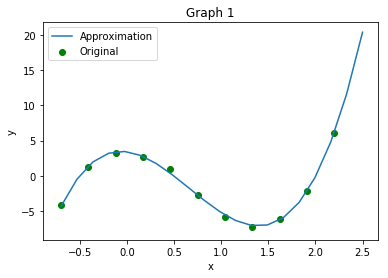

In [5]:
a = mnk(x, y, 3)
px = np.linspace(-0.7, 2.5, 20)
py = [poly(a, x_i) for x_i in px] 
plt.plot(px, py)
plt.scatter(x, y, c='g')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph 1")
_ = plt.legend(("Approximation", "Original"))

#### 5

In [6]:
def mnk_qr(x, y, m=1):
    n = len(x)
    A = np.zeros(shape=(n, m+1))
    
    for i in range(n):
        for j in range(m+1):
            A[i, j] = x[i]**j
            
    Q, R = qr(A)
    R1 = R[:m+1, :m+1]
    f = np.dot(Q.T, y)[:m+1]
    a = np.linalg.solve(R1, f)
    
    return a

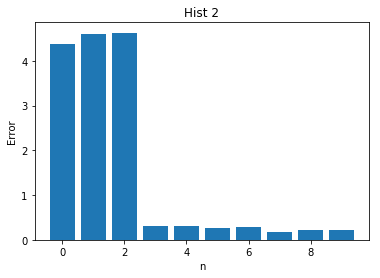

In [7]:
pl = 10
err_bar = [err_func(x, y, mnk_qr(x, y, m)) for m in range(pl)]
plt.bar(np.linspace(0, pl-1, pl), err_bar)
plt.xlabel("n")
plt.ylabel("Error")
_ = plt.title("Hist 2")

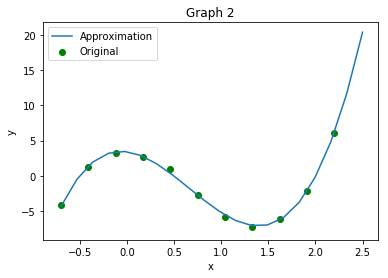

In [8]:
a = mnk_qr(x, y, 3)
px = np.linspace(-0.7, 2.5, 20)
py = [poly(a, x_i) for x_i in px]
plt.plot(px, py)
plt.scatter(x, y, c='g')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph 2")
_ = plt.legend(("Approximation", "Original"))

Как видно из графиков, оба метода выдают одинаковый результат.

#### 5.3.4

$y=\sqrt{a+bx^2}$

Замена:

$q=x^2 \\
p=y^2$

$p = a+bq$

In [9]:
def func(a, x):
    return np.sqrt(a[0] + a[1]*x**2)

In [10]:
xx = np.array([-2.0, -1.6, -1.2, -0.8, -0.4, \
              0, 0.4, 0.8, 1.2, 1.6, 2.0], dtype=float)
yy = np.array([1.649, 1.942, 2.142, 2.274, 2.35, \
               2.375, 2.35, 2.274, 2.142, 1.942, 1.649], dtype=float)

In [11]:
q = xx**2
p = yy**2

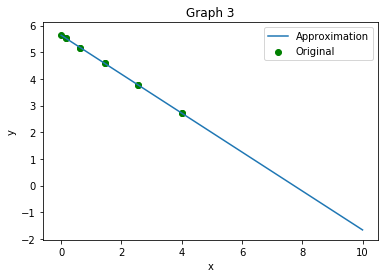

In [12]:
a = mnk(q, p, 1)
px = np.linspace(0, 10, 20)
py = [poly(a, x_i) for x_i in px]
plt.plot(px, py)
plt.scatter(q, p, c='g')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph 3")
_ = plt.legend(("Approximation", "Original"))

In [13]:
a

array([ 5.63931148, -0.72995405])

Перейдем к изначальным переменным $x$ и $y$:

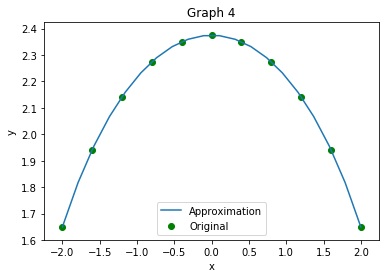

In [14]:
px = np.linspace(-2, 2, 20)
py = [func(a, x_i) for x_i in px]

plt.plot(px, py)
plt.scatter(xx, yy, c='g')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph 4")
_ = plt.legend(("Approximation", "Original"))

#### 5.5.4

In [15]:
a = 3
b = 4
x = np.array([-1+0.1*k for k in range(21)])
y = np.array([0.1931, 1.242, 1.7388, 1.7317, 1.2585, 0.1876, -1.1307,\
              -2.06, -2.0782, -1.1179, 0.2087, 1.2317, 1.7312, 1.7316, 1.2483, \
              0.1898, -1.1263, -2.0577, -2.0713, -1.1084, 0.2066], dtype=float)

In [16]:
def sin_1(x, a=a):
    return np.sin(a*np.pi*x)
def cos_1(x, b=b):
    return np.cos(b*np.pi*x)

Модифицируем метод наименьших квадратов, приведя его к более общему виду:

In [17]:
def mnk_com(x, y, f_set):
    n = len(x)
    m = len(f_set)
    A = np.zeros(shape=(n, m))
    
    for i in range(n):
        for j in range(m):
            A[i, j] = f_set[j](x[i])
            
    return np.linalg.solve(np.dot(A.T, A), np.dot(A.T, y))

In [18]:
c = mnk_com(x, y, [sin_1, cos_1])
print(c)

[5.76038694e-05 2.01690093e-01]


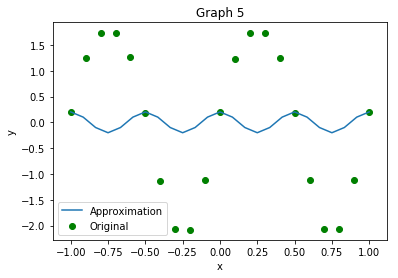

In [19]:
px = np.linspace(-1, 1, 25)
py = [c[0]*sin_1(q, a) + c[1]*cos_1(q, b) for q in px]

plt.plot(px, py)
plt.scatter(x, y, c='g')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph 5")
_ = plt.legend(("Approximation", "Original"))

Полученная функция очень плохо приближает исходную, поскольку в данном случае неудачно подобраны параметры $a$ и $b$, регулирующие частоты базисных функций

#### 5.9.4

$f(x) =  6\frac{\sin{x}}{x} \\
f'(x) = 6\frac{x\cos{x} - \sin{x}}{x^2} \\
[a, b] = [5, 15] $

In [20]:
def f(x):
    return 6*np.sin(x)/x
def df(x):
    return 6*(x*np.cos(x) - np.sin(x))/x**2

a = 5; b = 15; n = 10
x = np.linspace(5, 15.1, n+1)
y = f(x)
h = (b-a)/n
h

1.0

Глобальная интерполяция интерполирующим полиномом Лагранжа

In [21]:
def cheb(n):
    return np.sort(np.array([np.cos(np.pi*(2*k + 1)/(2*n)) for k in range(n)]))
def cheb_ext(n, a, b):
    t = cheb(n)
    return np.array([(a+b)/2 + t_i*(b-a)/2 for t_i in t])
def l_interp(arg, nodes, ind, deg):
    out = 1
    for j in range(deg):
        if j != ind:
            out *= (arg-nodes[j])/(nodes[ind]-nodes[j]) 
            
    return out
            
def l_polinom(arg, nodes, py, deg):
    return sum([py[i]*l_interp(arg, nodes, i, deg) for i in range(deg)])

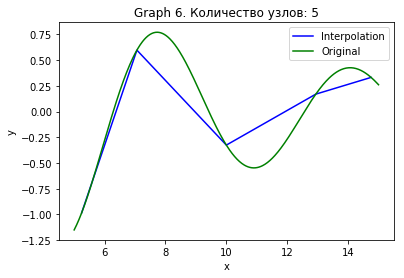

In [22]:
n = 5
cx = cheb_ext(n, a, b)
cy = f(cx)
cy_0 = [l_polinom(arg, cx, cy, deg=n) for arg in cx]

x0 = np.linspace(5, 15, 500)
y0 = f(x0)

plt.plot(cx, cy_0, c='b')
plt.plot(x0, y0, c='green')


plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph 6. Количество узлов: {}".format(n))
_ = plt.legend(("Interpolation", "Original"))

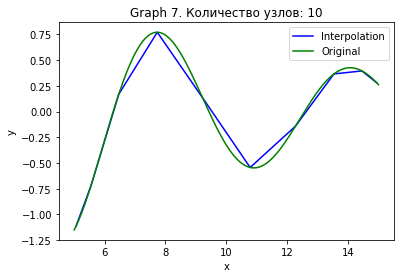

In [23]:
n = 10
cx = cheb_ext(n, a, b)
cy = f(cx)
cy_0 = [l_polinom(arg, cx, cy, deg=n) for arg in cx]

x0 = np.linspace(5, 15, 500)
y0 = f(x0)

plt.plot(cx, cy_0, c='b')
plt.plot(x0, y0, c='green')


plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph 7. Количество узлов: {}".format(n))
_ = plt.legend(("Interpolation", "Original"))

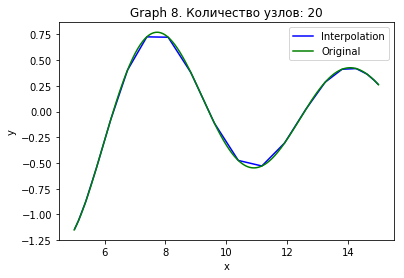

In [24]:
n = 20
cx = cheb_ext(n, a, b)
cy = f(cx)
cy_0 = [l_polinom(arg, cx, cy, deg=n) for arg in cx]

x0 = np.linspace(5, 15, 500)
y0 = f(x0)

plt.plot(cx, cy_0, c='b')
plt.plot(x0, y0, c='green')


plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph 8. Количество узлов: {}".format(n))
_ = plt.legend(("Interpolation", "Original"))

Интерполяция локальным сплайном (то есть наклон сплайна $s_i = f'(x_i) $)

In [25]:
def interp_spline(arg, px, py, h=h, a=a):
    i = int((arg-a)//h + 1)
    if i == len(px):
        i = len(px)-1
    return (((arg - px[i])**2)*(2*(arg-px[i-1]) + h)/h**3)*py[i-1] + \
(((arg - px[i-1])**2)*(2*(px[i] - arg) + h)/h**3)*py[i] + \
(((arg - px[i])**2)*(arg-px[i-1])/h**2)*df(px[i-1]) + \
(((arg - px[i-1])**2)*(arg - px[i])/h**2)*df(px[i])

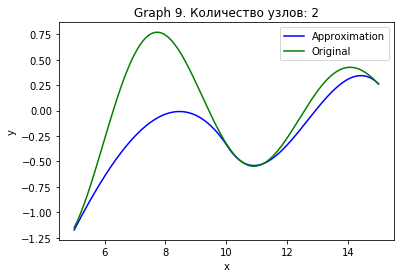

In [26]:
n=2
x = np.linspace(5, 15.1, n+1)
y = f(x)
h = (b-a)/n

x0 = np.linspace(5, 15, 500)
y0 = f(x0)
iy = [interp_spline(arg, px=x, py=y, h=h) for arg in x0]
plt.plot(x0, iy, c='b')
plt.plot(x0, y0, c='green')


plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph 9. Количество узлов: {}".format(n))
_ = plt.legend(("Approximation", "Original"))

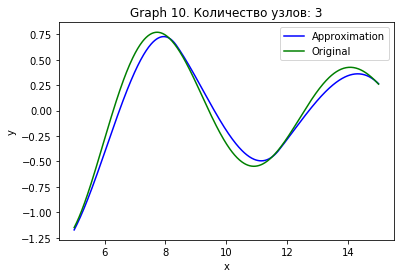

In [27]:
n=3
x = np.linspace(5, 15.1, n+1)
y = f(x)
h = (b-a)/n

x0 = np.linspace(5, 15, 500)
y0 = f(x0)
iy = [interp_spline(arg, px=x, py=y, h=h) for arg in x0]
plt.plot(x0, iy, c='b')
plt.plot(x0, y0, c='green')


plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph 10. Количество узлов: {}".format(n))
_ = plt.legend(("Approximation", "Original"))

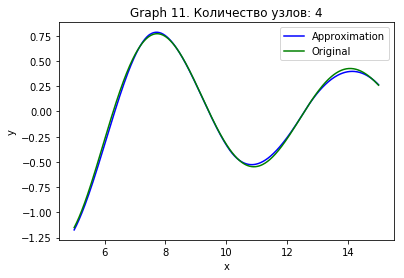

In [28]:
n=4
x = np.linspace(5, 15.1, n+1)
y = f(x)
h = (b-a)/n

x0 = np.linspace(5, 15, 500)
y0 = f(x0)
iy = [interp_spline(arg, px=x, py=y, h=h) for arg in x0]
plt.plot(x0, iy, c='b')
plt.plot(x0, y0, c='green')


plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph 11. Количество узлов: {}".format(n))
_ = plt.legend(("Approximation", "Original"))

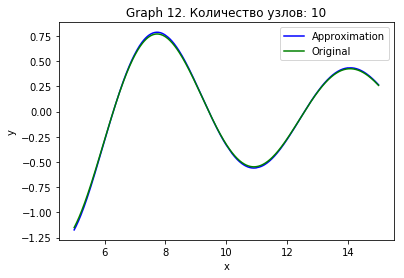

In [29]:
n=10
x = np.linspace(5, 15.1, n+1)
y = f(x)
h = (b-a)/n

x0 = np.linspace(5, 15, 500)
y0 = f(x0)
iy = [interp_spline(arg, px=x, py=y) for arg in x0]
plt.plot(x0, iy, c='b')
plt.plot(x0, y0, c='green')


plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph 12. Количество узлов: {}".format(n))
_ = plt.legend(("Approximation", "Original"))

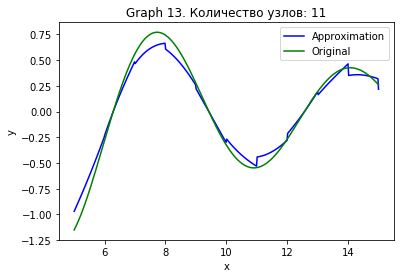

In [30]:
n=11
x = np.linspace(5, 15.1, n+1)
y = f(x)
h = (b-a)/n

x0 = np.linspace(5, 15, 500)
y0 = f(x0)
iy = [interp_spline(arg, px=x, py=y) for arg in x0]
plt.plot(x0, iy, c='b')
plt.plot(x0, y0, c='green')


plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph 13. Количество узлов: {}".format(n))
_ = plt.legend(("Approximation", "Original"))

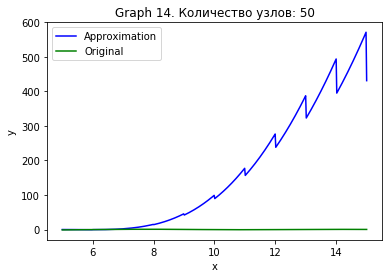

In [31]:
n=50
x = np.linspace(5, 15.1, n+1)
y = f(x)
h = (b-a)/n

x0 = np.linspace(5, 15, 500)
y0 = f(x0)
iy = [interp_spline(arg, px=x, py=y) for arg in x0]
plt.plot(x0, iy, c='b')
plt.plot(x0, y0, c='green')


plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph 14. Количество узлов: {}".format(n))
_ = plt.legend(("Approximation", "Original"))

При увеличении числа узлов $n$ качество интерполяции сперва увеличивается, но при $n>10$ качество начинает резко ухудшаться, наблюдаются многочисленные колебания интерполирующей функции